# 3. Based on the past data, will podcasts occupy most listening time or music tracks? 🕒  

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import textwrap

# load data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')

### Find average track hours played per day for each year

In [7]:
# calculate total hours played and the number of unique days each year
average_track_hours = (
    music_tracks_df.groupby('year')
    .agg(
        # convert minutes to hours
        total_hours=('minutes_played', lambda x: x.sum()/60),
        # count unique days in each year
        unique_days=('date', lambda x: x.nunique()))
).reset_index()

In [8]:
# calculate average hours per day for each year
average_track_hours['avg_track_hours'] =(
    average_track_hours['total_hours']/average_track_hours['unique_days']
).round(1)

average_track_hours['avg_track_hours']

0    5.2
1    6.0
2    5.6
3    3.3
4    1.8
5    2.7
6    1.7
Name: avg_track_hours, dtype: float64

### Find average podcast hours played per day for each year

In [9]:
average_podcast_hours =(
    podcast_episodes_df.groupby('year')
    .agg(
        total_hours=('minutes_played', lambda x: x.sum()/60),
        unique_days=('date', lambda x:x.nunique()))
).reset_index()

In [10]:
average_podcast_hours['avg_podcast_hours']=(
    average_podcast_hours['total_hours']/average_podcast_hours['unique_days']
).round(1)
average_podcast_hours['avg_podcast_hours']

0    0.1
1    4.3
2    5.0
3    3.7
4    6.0
Name: avg_podcast_hours, dtype: float64

### Combine both datasets

In [11]:
# Combine both datasets based on year
combined_data = pd.merge(
    average_podcast_hours[['year','avg_podcast_hours']],
    average_track_hours[['year','avg_track_hours']]
)

### Melt combined dataset to unpivot to prepare for visualization

In [16]:
'''
pd.melt(
frame,  #the DataFrame to melt
id_vars=___, # columns to keep
values_vars=____, # columns to melt
var_name=___, # new column name for the melted variable
value_name=___, #new column name for the values
)
'''

melted_data=pd.melt(
    combined_data,
    id_vars='year',
    value_vars=['avg_track_hours','avg_podcast_hours'],
    var_name='Category',
    value_name='Average Hours'
)

### Plot the line chart

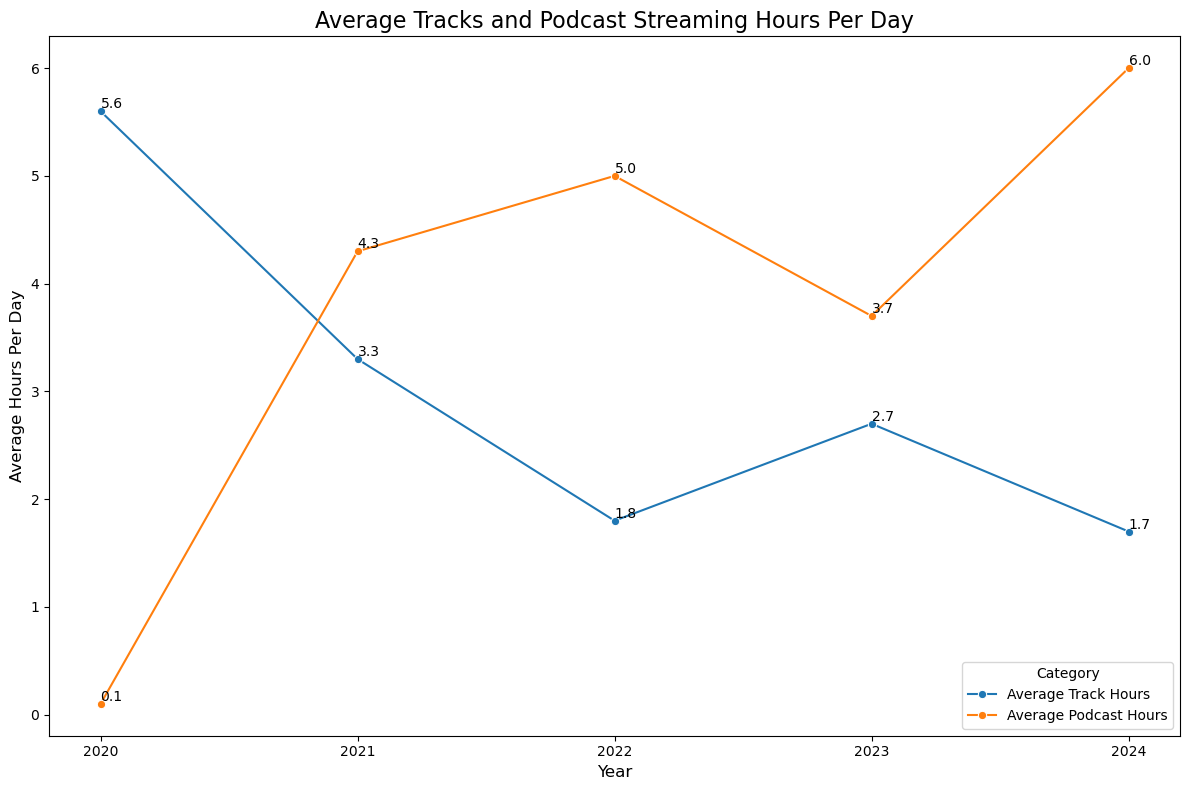

In [39]:
plt.figure(figsize=(12,8))
# assign the axis to ax
ax= sns.lineplot(
    data=melted_data,
    x='year',
    y='Average Hours',
    hue='Category',
    marker='o'
)
# ensure year label is unique integer
plt.xticks(
    ticks=melted_data['year'].unique(),
    labels=melted_data['year'].unique().astype(int)
)

# rename legend labels
# dictionary for labels to replace
legend_labels = {
    'avg_track_hours': 'Average Track Hours',
    'avg_podcast_hours': 'Average Podcast Hours'
}

#retrieve the current handles and labels from the plot
'''
handle is the visual element of the legend (line or marker)
label is the text shown next to each handle 
'''
handles, labels=ax.get_legend_handles_labels()

#update the legend labels
updated_labels=[legend_labels[label] for label in labels]


# Add labels to each marker
# combine with for loop to split data to tracks and podcast
for line_category in melted_data['Category'].unique():
    category_data = melted_data[melted_data['Category'] == line_category]
    for x, y in zip(category_data['year'], category_data['Average Hours']):
        '''
        zip()
        combines two lists or arrays into pairs of corresponding values.
        for each iteration, 
        x represents a value from 'year' column
        y represents a vluea from 'average hours' column
        '''
        plt.text(
            x, y, f'{y:.1f}',  # Format the label to 1 decimal place
            fontsize=10,
            ha='left',
            va='bottom'
        )
        '''
        plt.text(x,y,s, **kwargs)
        x: the x-coordinate where the text will be placed.
        y: the y-coordinate where the text will be placed.
        s: the string to display.
        kwargs: optional. customize the appearance (font size, alignment, 
        color, etc)
        '''

# apply the updated labels to the legend
plt.legend(
    handles=handles,
    labels=updated_labels,
    title='Category',
    loc='lower right'
)
plt.title('Average Tracks and Podcast Streaming Hours Per Day',fontsize=16)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Hours Per Day',fontsize=12)

plt.tight_layout()
plt.show()